In [1]:
import numpy as np
import torch
from helper_functions.helper_functions import NoiseAddition,DataNormalization, Interpolate
from matplotlib import pyplot as plt

In [2]:
data=np.load(r'E:\Simulated_and_experimental_data\Synthetic_data\all_data_same_length_no_base_add_noise\param_fbh_gaussian_size10mm_depth10pct_thickness3mm.npz',allow_pickle=True)
data_tr=torch.from_numpy(data['data']).to(torch.float32)

In [6]:
img=data_tr[:,205,:]  # add batch and channel dimensions
inter=Interpolate(size=512)
img_resized=inter.interpolate(img)

In [7]:
img.size()

torch.Size([334, 512])

In [8]:
img_resized.size()

torch.Size([512, 512])

Text(0.5, 1.0, 'Resized Image (512 pixels)')

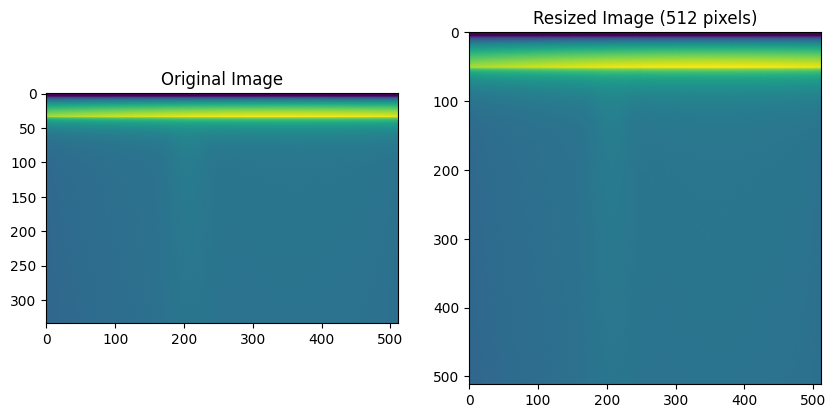

In [9]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('Original Image')

plt.subplot(1,2,2)
plt.imshow(img_resized)
plt.title('Resized Image (512 pixels)')

In [11]:
cal_data=np.load(r'C:\Users\stone\Temporal_thermal_image\normalization_params.npz',allow_pickle=True)
deltaT_min=cal_data['T_min']
deltaT_max=cal_data['T_max']


In [13]:
deltaT_min

array(-0.44175044)

(200.0, 210.0)

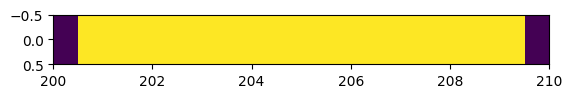

In [41]:
pos=230
plt.imshow(data['mask'][pos:pos+1])
plt.xlim(200,210)

In [42]:
data['mask'][pos:pos+1]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [46]:
(100-data['meta'][40][1].astype(np.float32))/100

np.float32(0.9)

In [47]:
data=np.load('E:\Simulated_and_experimental_data\Synthetic_data\B-scans\data\param_fbh_gaussian_size10mm_depth40pct_thickness3mm_row_0208.npy',allow_pickle=True)
mask=np.load('E:\Simulated_and_experimental_data\Synthetic_data\B-scans\detection\param_fbh_gaussian_size10mm_depth40pct_thickness3mm_row_0208.npy',allow_pickle=True)
depth=np.load('E:\Simulated_and_experimental_data\Synthetic_data\B-scans\depth\param_fbh_gaussian_size10mm_depth40pct_thickness3mm_row_0208.npy',allow_pickle=True)

Text(0, 0.5, 'Defect depth [%]')

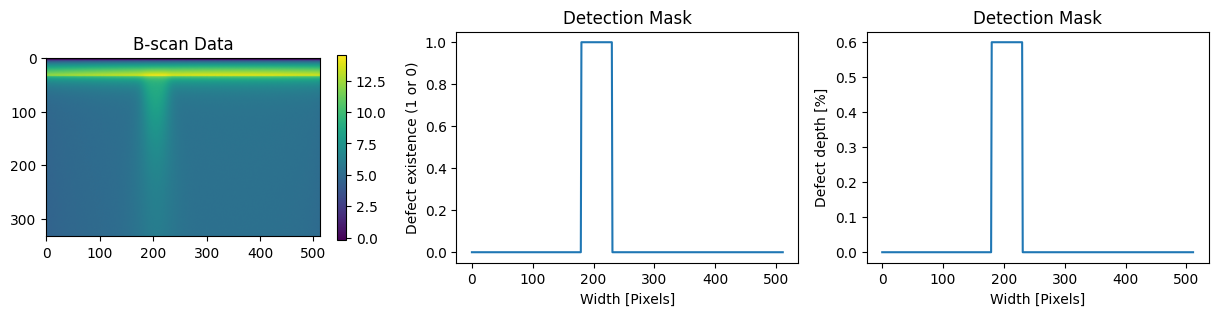

In [58]:
plt.figure(figsize=(15,3))
plt.subplot(1,3,1)
plt.imshow(data)
plt.title('B-scan Data')
plt.colorbar(shrink=0.8)

plt.subplot(1,3,2)
plt.plot(mask)
plt.title('Detection Mask')
plt.xlabel('Width [Pixels]')
plt.ylabel('Defect existence (1 or 0)')

plt.subplot(1,3,3)
plt.plot(depth)
plt.title('Detection Mask')
plt.xlabel('Width [Pixels]')
plt.ylabel('Defect depth [%]')


